# Rainfall in Australia

 **The things that really change the world, according to <a href="https://en.wikipedia.org/wiki/Chaos_theory" target="_blank">Chaos Theory</a>, are the tiny things. A butterfly flaps its wings in the Amazonian jungle, and subsequently a storm ravages half of Australia.**

# Introduction

You are given the task of predicting if it will rain tomorrow in cities of Australia. You can easily get lost if you don’t have a structured methodology to guide your way and you will use <a href="https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining" target="_blank">CRISP-DM</a> in this project.

<img src="images/crisp_dm.png" width=350 height=350 />

Step by step you will:

- Learn about the domain
- Understand what kind of data you have
- Explore and prepare it for machine learning
- Build your first model
- Interpret your findings
- Get ready for deployment

It is quite a lot, so let's get started!

# 1. Business Understanding
    The Zen: First seek to understand then be understood...

Everything starts with business understanding. You don’t dive head first into coding like those Kaggle heroes. Without learning about the business you can’t figure out what to do with the data you have and also you can’t communicate your results with your colleagues. Generally you set up meetings with domain experts and read papers to learn about the domain. 

Talking to domain experts or the business is critical because in the end you will have to “sell” your results to these people. You need to make sure their ideas are respected from the beginning. They will tell you great insights that you can code into your solution.


So now, as a first step you will start learning about the climate and geography of Australia on your own, since you are a one-man-company in this tutorial.

We are in the business of weather forecasting which is a complex
system. Complex doesn’t mean hard to understand but it means dozens of factors interacting and creating a causal diagram with balancing and reinforcing effects.


A typical causal diagram is given below for demonstration purposes to show you the balancing and reinforcing effects:

<img src="images/causal.png" width=600 height=600 />

These causal diagrams can capture what you can not see using simple flow charts. If you read <a href="https://www.amazon.com/Book-Why-Science-Cause-Effect/dp/046509760X" target="_blank">this book</a> it will help you to develop better *causal loops* and overall better projects. It may look chaotic at the beginning but anyway that’s what we are dealing with here: 
- An entire huge oceanic continent 
- Dozens of cities
- At least 6 different climate zones 
- Large-scale atmospheric and oceanic drivers  
- Suffering from greenhouse effects for decades! 

The climate analogies help you understand what to expect from different regions of Australia:


<img src="images/climates.png" width=600 height=600 />

These climate zones can be listed as follows:
1. Hot humid summer, warm winter 
2. Warm humid summer, mild winter 
3. Hot dry summer, warm winter 
4. Hot dry summer, cool winter
5. Warm temperate 
6. Mild temperate 
7. Cool temperate 
8. Alpine (the island of Tanzania)


It is not over. There are also the winds:

<img src="images/winds.png" width=600 height=600 />

The climate experts never know if El Nino or La Nina would hit the continent in the current year in advance. And if it happens these will change the entire rainfall story with a big deal.

But of course this doesn’t tell us about the rain seasons in a year which is also quite funny in Australia. The northern part of the continent is rainy from October to April, and the rest of the year is dry. The southern part has an opposite character: It expects the highest rain between April and November! 

The time of the year and location would play a significant part. 
The rain phenomena can happen under different levels of temperature in different climates. The Mediterrenean would expect it around 10-15 degrees while over 30 degrees is also normal for the Monsoon rain. 


Ok, right, but how much rain is rain? A quick search reveals this:
- Light rain — when the precipitation rate is < 2.5 mm 
- Moderate rain — between 2.5 mm - 7.6 mm 
- Heavy rain — is > 7.6 mm 
- Violent rain — is > 50 mm


As a result, the underlying causal model and the degree of randomness make the climate of Australia more challenging to predict and all your models should be presented keeping these in mind: Take it with a “grain of salt”. Remember, you are not a meteorology scientist and you are only scratching the surface here.


However, thanks to your studies and research you are more confident to have a coffee with your meteorologist colleagues and you can ask them more meaningful questions!


Now, let’s read the data and understand how these so-called rain events look like.


# 2. Data Understanding
    The Zen: You can't know if it rained or not, if there is no tomorrow...

You start by importing the libraries you will use:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

Next you read your data into a `pandas` DataFrame and check how it looks like calling the `head()` function:

In [2]:
data_path = "data/rawdata_class.csv"

df = (pd
      .read_csv(data_path, index_col=[0]) # pass your path to read_csv:
      .sort_values(["Location","Date"]) # make sure you have an order by Location and Date
     )

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
93856,2008-07-01,Adelaide,8.8,15.7,1.6,2.6,NW,48.0,SW,W,13.0,15.0,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9,Yes
93857,2008-07-02,Adelaide,12.7,15.8,1.4,7.8,SW,35.0,SSW,SW,13.0,15.0,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,No
93858,2008-07-03,Adelaide,6.2,15.1,1.8,2.1,W,20.0,NNE,SW,2.0,11.0,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,No
93859,2008-07-04,Adelaide,5.3,15.9,1.4,8.0,NNE,30.0,NNE,NE,6.0,13.0,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,No
93860,2008-07-06,Adelaide,11.3,15.7,NaN,1.5,NNW,52.0,NNE,NNW,15.0,22.0,62.0,62.0,1019.5,1016.2,NaN,NaN,13.0,14.4,NaN


You read what columns you have:

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

You need to predict if it will rain tomorrow but the only information you have here is `RainToday`. This is going to be a puzzle you will need to solve.

The explanations of these columns are given in `description.md` file inside the project. However, most of them should be quite straight forward. They mainly talk about meteorological measurements like humidity and wind speed and direction.

## Learning about the locations

There are a lot to discover but, you first want to see some visualizations based on `Location`. This will help you to see the big picture and drill down your understanding from continent level to city level.

How many *unique* locations do we have and what are they anyway? You just use the `unique()` method to get this information:

In [5]:
locations = df["Location"].unique()

Now the `locations` variable holds the answer to your question. You can simply print it out and its length:

In [6]:
len(locations), locations

(49,
 array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object))

You have 49 nice locations and you want to explore them! We can use some visualizion tools available in `matplotlib` library in combination with `pandas`.

Taking a look into the moving average of rain events by these cities can be interesting. What does this mean? You first define a window you will slide over time. Let's says your window is 10. If it rained 2 times in the past 10 days the average will be 0.2

This average would change if you start moving this time window over time. That's how a typical rolling average works and in this case it would give you an intiution about the city you are interested in.

You see in the above `head()` summary that the `RainToday` variable is encoded with strings: *Yes* and *No*. You can't take and average of strings. So you first need to convert them into `1`s and `0`s.

The next chunk of code does exactly this:

In [7]:
# create your conditions:
cond0 = df["RainToday"] == "Yes"
cond1 = df["RainToday"] == "No"

# pass your conditions to filter and set the numeric column values:
df.loc[df[cond0].index, "RainToday"] = 1.0
df.loc[df[cond1].index, "RainToday"] = 0.0

You create a procedure to select a random city from the `locations` variable:

In [8]:
random_location = np.random.choice(locations)

and the winner location is:

In [9]:
print(random_location)

Nhil


Next you want to visualize this city but the dataframe contains all the cities. You need to create a condition and filter for the `random_location`. 

In [10]:
# create a condition for the randomly selected city
cond = df["Location"] == random_location

You will pass this condition to the DataFrame to filter only for the given location. The variable that you want to visualize is a 90 day rolling average of `RainToday` variable. The idea of 90 days is arbitrary. You are encouraged to try out 30 or 45 day averages as well. You will do both of these operations in a chain reaction below:

In [11]:
# create a y variable to visualize
y = (df[cond] # apply your condition
    .loc[:, "RainToday"] # select the variable
    .rolling(90).mean().values) # compute moving average

Congrats! You have just created a vector (or array) that you can plot quickly. Let's print and see how it looks like:

In [12]:
print(y[120:126])

[0.16666667 0.16666667 0.17777778 0.17777778 0.17777778 0.17777778]


Now the interesting part starts. How to put this array into a chart...

At the beginning you already imported the `matplotlib` library as `plt`. You will call a few methods to achive building a chart:

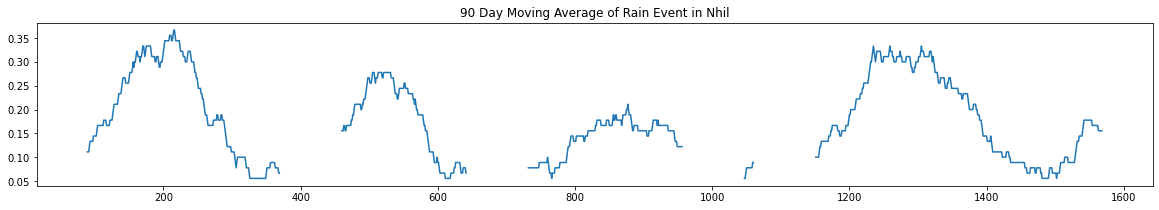

In [13]:
plt.figure(figsize=(20,3)) # create a 20 by 3 plot area
plt.plot(y) # place the y into the plot area
plt.title(f"90 Day Moving Average of Rain Event in {random_location}") # give a title!
plt.show() # and finally show the plot

You realize that there should be more than 3000 records for this location which makes sense. But what the hell are those periods without data? You were expecting to see a beautiful continuous moving average over time. Who is killing your fun?

You see the chart of another location using the same code you wrote above:

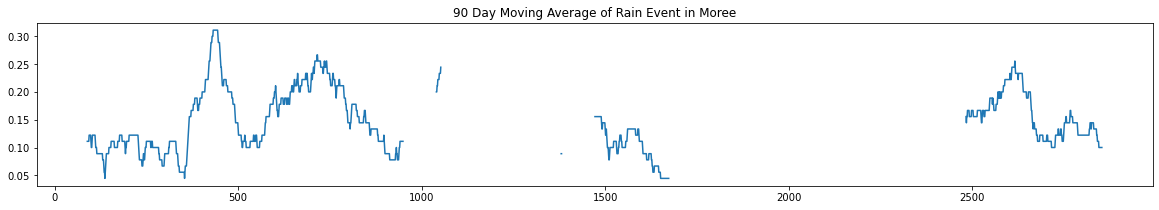

In [14]:
random_location = np.random.choice(locations)
cond = df["Location"] == random_location

y = (df[cond] 
    .loc[:, "RainToday"] 
    .rolling(90).mean().values)

plt.figure(figsize=(20,3)) 
plt.plot(y) 
plt.title(f"90 Day Moving Average of Rain Event in {random_location}") 
plt.show() 

After trying out with several randomly chosen cities you over and over see that there are gaps. So there were short and long breaks where the rain events were not recorded. You select 3 relevant columns to see this:

In [15]:
df[["Date", "Location", "RainToday"]].head(7)

,Date,Location,RainToday
93856,2008-07-01,Adelaide,1
93857,2008-07-02,Adelaide,0
93858,2008-07-03,Adelaide,0
93859,2008-07-04,Adelaide,0
93860,2008-07-06,Adelaide,NaN
93861,2008-07-07,Adelaide,1
93862,2008-07-08,Adelaide,1


You don't know if it rained or not on 6th of July. The gap you see above can change from 1 day to several days. This has significant impact on your work:

- NaN values intervene with moving average computation, generating periods without average.
- Because you want to predict if it rained or not tomorrow. And as you can see sometimes there is no record for tomorrow. It jumps from 4th of July to 6th of July!


    And if there is no tomorrow, 
        you can't know if it rained or not...

# 3. Data Preparation
    The Zen: Geographical proximity is your destiny

There is an unusual dilemma for you here. The expectation is to predict tomorrow but you have the variable for today only, that is `RainToday` in the dataset. The reality is yesterday's parameters should be predictors for the rain event today. Or we can say today's parameters should be the predictors for the rain event tomorrow. Both approaches are the same and you can achive it by shifting the `RainToday` variable 1 row up and renaming it `RainTomorrow`.

This might sound super straight forward but remember what you have discovered in the previous chapter. The continuation is broken. You have consecutive days of data collection ending with breaks and sometimes we don't know if it rained or not. Because of this reason, simply *shifting* `RainToday` by 1 row for each location will not be the right action. Instead you are forced to think about sequences (or time intervals, or streaks) where you can always have rain event recorded for the following day.

## A. Drop NAs
- You will drop the rows without rain information:

In [16]:
df2 = df[df['RainToday'].notna()]

Checkout the result:

In [17]:
df2.head(7)

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
93856,2008-07-01,Adelaide,8.8,15.7,1.6,2.6,NW,48.0,SW,W,13.0,15.0,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9,1
93857,2008-07-02,Adelaide,12.7,15.8,1.4,7.8,SW,35.0,SSW,SW,13.0,15.0,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,0
93858,2008-07-03,Adelaide,6.2,15.1,1.8,2.1,W,20.0,NNE,SW,2.0,11.0,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,0
93859,2008-07-04,Adelaide,5.3,15.9,1.4,8.0,NNE,30.0,NNE,NE,6.0,13.0,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,0
93861,2008-07-07,Adelaide,7.6,11.2,4.6,1.1,WSW,46.0,WNW,SW,17.0,13.0,83.0,88.0,1015.9,1017.9,NaN,NaN,9.8,9.3,1
93862,2008-07-08,Adelaide,5.3,13.5,0.6,2.1,SW,43.0,SW,WSW,11.0,22.0,73.0,91.0,1025.8,1025.9,NaN,NaN,10.9,10.8,1
93863,2008-07-09,Adelaide,8.4,14.3,1.6,0.8,NW,41.0,N,NW,9.0,19.0,90.0,64.0,1025.8,1022.7,NaN,NaN,10.8,13.5,1


You realize that when you removed the rows witn `NA`s in `RainToday` you also broke the continuation of the indicies. For example the index jumps from 93859 to 93861. You will use this information to your advantage next.

## B. Count the Intervals

You will have 3 main steps here:

- Create a flag for each interval's ending point
- Create `RainTomorrow` variable using `RainToday`
- Drop unnecessary columns in the end

You make an explicit `index` column because you want to compare the current and the next indicies:

In [18]:
df2["index_col"] = df2.index

Now you have a new column called `index`

Create a new column called `next_index` using this `index` column by shifting it by 1 row up:

In [19]:
df2["next_index"] = df2["index_col"].shift(-1)

If you checkout the result you will see that it is nicely showing you the current and next indicies:

In [20]:
df2[["Date", "RainToday", "index_col", "next_index"]].head(7)

,Date,RainToday,index_col,next_index
93856,2008-07-01,1,93856,93857.0
93857,2008-07-02,0,93857,93858.0
93858,2008-07-03,0,93858,93859.0
93859,2008-07-04,0,93859,93861.0
93861,2008-07-07,1,93861,93862.0
93862,2008-07-08,1,93862,93863.0
93863,2008-07-09,1,93863,93864.0


It is now straight forward to think about the numeric difference between these two variables. If the difference is greater than 1, it means that the current row is end of the interval:

In [21]:
df2["end_of_interval"] = df2["next_index"] - df2["index_col"] > 1

You want to check the end result and see the encoded end of intervals:

In [22]:
df2[["Date", "RainToday", "index_col", "next_index", "end_of_interval"]].head(7)

,Date,RainToday,index_col,next_index,end_of_interval
93856,2008-07-01,1,93856,93857.0,False
93857,2008-07-02,0,93857,93858.0,False
93858,2008-07-03,0,93858,93859.0,False
93859,2008-07-04,0,93859,93861.0,True
93861,2008-07-07,1,93861,93862.0,False
93862,2008-07-08,1,93862,93863.0,False
93863,2008-07-09,1,93863,93864.0,False


## C. Create `RainTomorrow`

- You are going to utilize the idea of **shifting** again

Now that you have the *end of intervals* set in your DataFrame:
- You can shift all the values of `RainToday` variable 1 row up if the record is not for an interval end. 
- Naturally, this will generete 1s and 0s for rain and no rain events. But how about if there is no tomorrow?
- If the record is for an interval end (meaning no tomorrow), you flag it with 2 to differenciate

In [23]:
cond0 = df2["end_of_interval"] == False
cond1 = df2["end_of_interval"] == True

df2.loc[df2[cond0].index, "RainTomorrow"] = df2["RainToday"].shift(-1)
df2.loc[df2[cond1].index, "RainTomorrow"] = 2

You check out your result to see if it is as expected:

In [24]:
df2.head(7)

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,index_col,next_index,end_of_interval,RainTomorrow
93856,2008-07-01,Adelaide,8.8,15.7,1.6,2.6,NW,48.0,SW,W,13.0,15.0,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9,1,93856,93857.0,False,0
93857,2008-07-02,Adelaide,12.7,15.8,1.4,7.8,SW,35.0,SSW,SW,13.0,15.0,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,0,93857,93858.0,False,0
93858,2008-07-03,Adelaide,6.2,15.1,1.8,2.1,W,20.0,NNE,SW,2.0,11.0,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,0,93858,93859.0,False,0
93859,2008-07-04,Adelaide,5.3,15.9,1.4,8.0,NNE,30.0,NNE,NE,6.0,13.0,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,0,93859,93861.0,True,2
93861,2008-07-07,Adelaide,7.6,11.2,4.6,1.1,WSW,46.0,WNW,SW,17.0,13.0,83.0,88.0,1015.9,1017.9,NaN,NaN,9.8,9.3,1,93861,93862.0,False,1
93862,2008-07-08,Adelaide,5.3,13.5,0.6,2.1,SW,43.0,SW,WSW,11.0,22.0,73.0,91.0,1025.8,1025.9,NaN,NaN,10.9,10.8,1,93862,93863.0,False,1
93863,2008-07-09,Adelaide,8.4,14.3,1.6,0.8,NW,41.0,N,NW,9.0,19.0,90.0,64.0,1025.8,1022.7,NaN,NaN,10.8,13.5,1,93863,93864.0,False,1


Congrats, you have reshaped your data and created the `RainTomorrow` variable with success. Now you have a target variable you can use to train your model. However, you will never use those helper columns you generated on the go again. So you want to drop them before you continue:

In [25]:
cols_to_drop = ["index_col", "next_index", "end_of_interval"]
df2.drop(cols_to_drop, axis=1, inplace=True)

Since you will use this dataset quite often, you don't want to run all these code again and again. Instead you want to save it to your `data` folder and read it from there whenever you need:

In [26]:
df2.to_csv("data/class_clean.csv", index=False)

## D. Explore some questions

- In how many of the cases when it is raining today it also rained tomorrow?

In [27]:
cond0 = df2["RainToday"] == 1
cond1 = df2["RainTomorrow"] == 1

total_rain_tomorrow = len(df2[cond1])
total_rain_today_and_tomorrow = len(df2[cond0 & cond1])

print(total_rain_today_and_tomorrow, total_rain_tomorrow)

14401 30811


You see that in almost 50% of the cases when it rains today it also rains tomorrow. You realize perhaps it can help you with predictions.

- What else? `Humidity` is often associated with the rain. You want to explore how the rain event is changing with the average `Humidity` next:

You want to do it in a randomized fashion. Take random 300 datapoints and plot the `RainTomorrow` with a rolling average of `Humidity3pm`. You run this several times to see different points in time. 

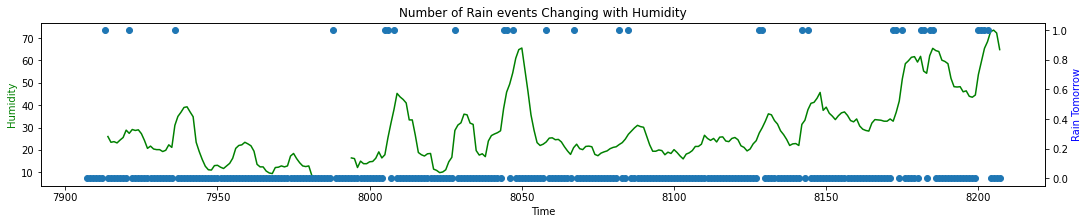

In [28]:
cond0 = (df2["RainTomorrow"] == 1) | (df2["RainTomorrow"] == 0)

random_start = np.random.choice(df2[cond0].index)
random_finish = random_start + 300

fig, ax1 = plt.subplots(figsize=(18,3))

ax2 = ax1.twinx()
ax1.plot(df2[cond0].loc[random_start:random_finish, "Humidity3pm"].rolling(7).mean(), 'g-')
ax2.plot(df2[cond0].loc[random_start:random_finish, "RainTomorrow"], 'o')

ax1.set_xlabel('Time')
ax1.set_ylabel('Humidity', color='g')
ax2.set_ylabel('Rain Tomorrow', color='b')
plt.title("Number of Rain events Changing with Humidity")

plt.show()

You realize that there is a really a link between them. If we observe more humidity today, we observe more rain event for the next days. You are encoraged to drill this down to location level and practice further.

# 4. Modelling
    The Zen: Wheather forecasting has a wet bias

In [29]:
data = pd.read_csv("data/class_clean.csv")

In [30]:
cols = ["Date", "Humidity3pm", "WindGustSpeed", "Pressure3pm", "Location",
        "Temp3pm", "RainToday", "RainTomorrow"]

cond0 = data["RainTomorrow"] == 2 # remove the cases without tomorrow
cond1 = data["Date"].str.contains("2017") # remove 2017 because it will be our test set

data2 = data[cols][~cond0 & ~cond1].drop("Date", axis=1).dropna()

How many rain events do you have? You can achieve this by counting the values of `RainTomorrow`:

In [31]:
data2["RainTomorrow"].value_counts()

0.0    87469
1.0    24598
Name: RainTomorrow, dtype: int64

You need establish a baseline from the beginning. Because if you build a model you need to be able compare and see if it makes sense. 

## A. Your baseline model

- You have 22% rainy and 78% no rainy days in your data
- You need to **beat this baseline**
- Because a naive forecast would tell no rain by fault and get it right 78% of the time
- Could you achieve a better result?
- You will keep an eye on both the Confusion Matrix and the AUC
- The data is unbalanced but not extremely.

In [32]:
data2.tail()

,Humidity3pm,WindGustSpeed,Pressure3pm,Location,Temp3pm,RainToday,RainTomorrow
140606,47.0,46.0,1011.1,Woomera,25.8,1.0,0.0
140607,27.0,48.0,1007.5,Woomera,30.7,0.0,0.0
140608,30.0,56.0,1014.7,Woomera,26.7,0.0,0.0
140609,15.0,46.0,1014.5,Woomera,29.7,0.0,0.0
140610,32.0,46.0,1009.8,Woomera,29.7,0.0,0.0


In [33]:
data2["Location"] = data2["Location"].astype("category").cat.codes
data2["Location"] = data2["Location"].astype("category")

In [34]:
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [35]:
X = data2.drop("RainTomorrow", axis=1)
y = data2[["RainTomorrow"]]

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112067 entries, 0 to 140610
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Humidity3pm    112067 non-null  float64 
 1   WindGustSpeed  112067 non-null  float64 
 2   Pressure3pm    112067 non-null  float64 
 3   Location       112067 non-null  category
 4   Temp3pm        112067 non-null  float64 
 5   RainToday      112067 non-null  float64 
dtypes: category(1), float64(5)
memory usage: 5.2 MB


In [37]:
#Logistic Regression 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf_logreg = LogisticRegressionCV(cv=3, random_state=0)
clf_logreg.fit(X_train, y_train)

y_pred = clf_logreg.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

print('Accuracy :', acc_score)
print('AUC :', auc_score)

Accuracy : 0.844451582967484
AUC : 0.7126402760225271


Congrats!!

In [38]:
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[20701,  1096],
       [ 3262,  2958]], dtype=int64)

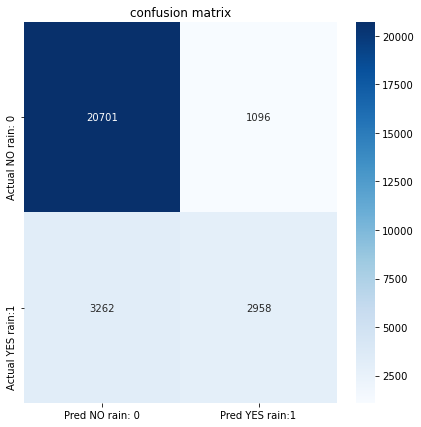

In [39]:
cm_matrix = pd.DataFrame(data=cm1, columns=['Pred NO rain: 0', 'Pred YES rain:1'], 
                                  index=['Actual NO rain: 0', 'Actual YES rain:1'])

plt.figure(figsize=(7,7))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("confusion matrix");

### The Wet Bias:
- You want to predict more rain
- Because in this business people get **more angry** if you predict no rain and then it rains! They will get wet!
- But they will forget if you predict rain and then nothing happens. The worst case scenario they will forget their umbrellas in the office.

In [40]:
pred_y = clf_logreg.predict(X_test) 

probs_y = clf_logreg.predict_proba(X_test)

probs_y_rain = probs_y[:, 1]
probs_y_rain[:10]

array([0.78249397, 0.06340286, 0.29756467, 0.02693488, 0.24496753,
       0.0377536 , 0.93086898, 0.25089418, 0.08801415, 0.0946576 ])

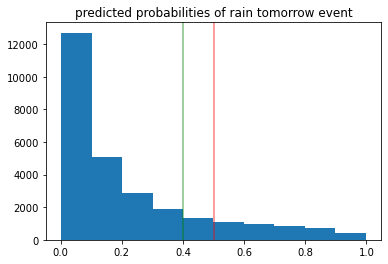

In [41]:
plt.hist(probs_y_rain)
plt.title("predicted probabilities of rain tomorrow event")
plt.axvline(x=0.5, c="red", alpha=0.5)
plt.axvline(x=0.4, c="green", alpha=0.5);

In [42]:
updated_preds = [1 if i > 0.4 else 0 for i in probs_y_rain]
updated_preds[:5]

[1, 0, 0, 0, 0]

In [43]:
cm2 = confusion_matrix(y_test, updated_preds)

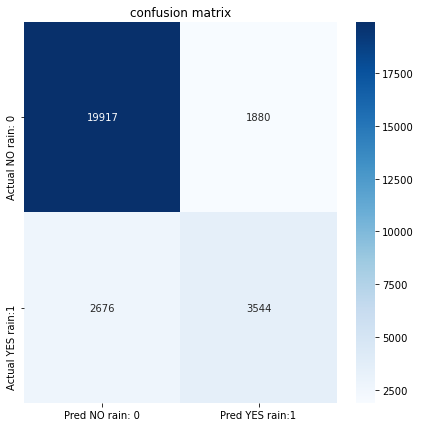

In [44]:
cm_matrix = pd.DataFrame(data=cm2, columns=['Pred NO rain: 0', 'Pred YES rain:1'], 
                                  index=['Actual NO rain: 0', 'Actual YES rain:1'])

plt.figure(figsize=(7,7))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("confusion matrix");

Correct the style and write more explanations here:

- We are done! We have a new threshold
- But what's going on here?
- We reduced the False Negatives with the cost of increasing the False Positives
- And this is not a problem in this business setting
- Because the people will take their umbrella more often and then they will forget it in the office since no rain
- However in the original setup they were told no rain and it was in fact raining (more often). Wet people lead to more anger!

# 5. Evaluation
    The Zen: Can you explain it to a 10 year old?

You built your model using the data from 2007 to end of 2016. How would it perform on a year which the model has not seen before? What would be the performance on 2017?

# 6. Deployment

What are your alternatives for depoloying? Let's explore a few scenarios

# Conclusion

Congrats

# Next Steps 

Do a **second** iteration from step 1 to 6:
- Explore more variables
- Try imputing the missing values and check if they help
- Think about different models
- How would you select which variable to use?
- Try a regression model using the regression data in the `data` folder